In [38]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Create a set of random latitudes and longitudes combinations. 
lats = np.random.uniform (low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform (low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [41]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [42]:
import requests
requests.__version__

'2.27.1'

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [44]:
# Starting the weather API call 
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b295e0b76b5a610ab30aaa4cab0ca2f1


In [45]:
# Create an endpoint URL for a city.
city = "Boston"
city_url = url + "&q=" + city
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b295e0b76b5a610ab30aaa4cab0ca2f1&q=Boston


In [46]:
import time 
from datetime import datetime

In [47]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging. 
print("Beginning of data retrieval       ")
print("----------------------------------")


# Print counters
record_count = 1
set_count = 1

# Loop through all the cities in our list. 
#for i in range(len(cities)):
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record{record_count} of set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
          
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning of data retrieval       
----------------------------------
Processing Record1 of set 1 | hithadhoo
Processing Record2 of set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record3 of set 1 | henties bay
Processing Record4 of set 1 | kem
Processing Record5 of set 1 | norman wells
Processing Record6 of set 1 | victoria
Processing Record7 of set 1 | port shepstone
Processing Record8 of set 1 | sao miguel do araguaia
Processing Record9 of set 1 | joshimath
Processing Record10 of set 1 | riyadh
Processing Record11 of set 1 | kota kinabalu
Processing Record12 of set 1 | adrar
Processing Record13 of set 1 | albany
Processing Record14 of set 1 | bluff
Processing Record15 of set 1 | mys shmidta
City not found. Skipping...
Processing Record16 of set 1 | samusu
City not found. Skipping...
Processing Record17 of set 1 | port lincoln
Processing Record18 of set 1 | port elizabeth
Processing Record19 of set 1 | jamestown
Processing Record20 of set 1 | mogadishu
Processing 

Processing Record42 of set 4 | caucaia
Processing Record43 of set 4 | burnie
Processing Record44 of set 4 | vostok
Processing Record45 of set 4 | vaitape
Processing Record46 of set 4 | bay roberts
Processing Record47 of set 4 | gigmoto
Processing Record48 of set 4 | novikovo
Processing Record49 of set 4 | vagamo
Processing Record50 of set 4 | halifax
Processing Record1 of set 5 | lake havasu city
Processing Record2 of set 5 | pontes e lacerda
Processing Record3 of set 5 | black river
Processing Record4 of set 5 | kisangani
Processing Record5 of set 5 | kirishi
Processing Record6 of set 5 | utiroa
City not found. Skipping...
Processing Record7 of set 5 | ouadda
Processing Record8 of set 5 | okhotsk
Processing Record9 of set 5 | wum
Processing Record10 of set 5 | chokurdakh
Processing Record11 of set 5 | qaanaaq
Processing Record12 of set 5 | juneau
Processing Record13 of set 5 | roald
Processing Record14 of set 5 | makat
Processing Record15 of set 5 | puerto escondido
Processing Record1

City not found. Skipping...
Processing Record33 of set 8 | yabrud
Processing Record34 of set 8 | birin
Processing Record35 of set 8 | beringovskiy
Processing Record36 of set 8 | puerto cabezas
Processing Record37 of set 8 | ocampo
Processing Record38 of set 8 | sataua
City not found. Skipping...
Processing Record39 of set 8 | khani
Processing Record40 of set 8 | sola
Processing Record41 of set 8 | martil
Processing Record42 of set 8 | shahe
Processing Record43 of set 8 | inhambane
Processing Record44 of set 8 | port augusta
Processing Record45 of set 8 | victor harbor
Processing Record46 of set 8 | yomitan
City not found. Skipping...
Processing Record47 of set 8 | ongandjera
Processing Record48 of set 8 | loukhi
Processing Record49 of set 8 | neyshabur
Processing Record50 of set 8 | alyangula
Processing Record1 of set 9 | sangar
Processing Record2 of set 9 | mangrol
Processing Record3 of set 9 | itubera
Processing Record4 of set 9 | nieuw amsterdam
Processing Record5 of set 9 | krasnos

Processing Record24 of set 12 | nova olinda do norte
Processing Record25 of set 12 | bin qirdan
Processing Record26 of set 12 | shimoda
Processing Record27 of set 12 | kabwe
Processing Record28 of set 12 | gao
Processing Record29 of set 12 | cam ranh
Processing Record30 of set 12 | isla vista
Processing Record31 of set 12 | jacmel
Processing Record32 of set 12 | balakhta
Processing Record33 of set 12 | hay river
Processing Record34 of set 12 | lata
Processing Record35 of set 12 | marsaxlokk
Processing Record36 of set 12 | carbonia
Processing Record37 of set 12 | okha
Processing Record38 of set 12 | manali
Processing Record39 of set 12 | ekibastuz
Processing Record40 of set 12 | priargunsk
Processing Record41 of set 12 | cape coast
Processing Record42 of set 12 | olavarria
Processing Record43 of set 12 | touros
Processing Record44 of set 12 | ocos
Processing Record45 of set 12 | campo de la cruz
Processing Record46 of set 12 | vila velha
Processing Record47 of set 12 | catamarca
Process

In [48]:
len(city_data)

564

In [49]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,81.16,77,97,17.56,MV,2022-10-10 17:00:22
1,Henties Bay,-22.1160,14.2845,60.80,92,60,4.68,NA,2022-10-10 17:00:23
2,Kem,64.9555,34.5793,46.96,80,100,12.10,RU,2022-10-10 17:00:25
3,Norman Wells,65.2820,-126.8329,33.22,92,100,31.32,CA,2022-10-10 17:00:26
4,Victoria,22.2855,114.1577,76.32,44,33,11.99,HK,2022-10-10 16:57:03
5,Port Shepstone,-30.7414,30.4550,69.46,87,29,19.17,ZA,2022-10-10 17:00:27
6,Sao Miguel Do Araguaia,-13.2750,-50.1628,101.59,17,55,9.78,BR,2022-10-10 17:00:28
7,Joshimath,30.5667,79.5667,57.34,71,54,6.02,IN,2022-10-10 17:00:28
8,Riyadh,24.6877,46.7219,87.75,11,0,6.33,SA,2022-10-10 17:00:29
9,Kota Kinabalu,5.9749,116.0724,76.98,88,20,5.01,MY,2022-10-10 17:00:30


In [52]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-10-10 17:00:22,-0.6000,73.0833,81.16,77,97,17.56
1,Henties Bay,NA,2022-10-10 17:00:23,-22.1160,14.2845,60.80,92,60,4.68
2,Kem,RU,2022-10-10 17:00:25,64.9555,34.5793,46.96,80,100,12.10
3,Norman Wells,CA,2022-10-10 17:00:26,65.2820,-126.8329,33.22,92,100,31.32
4,Victoria,HK,2022-10-10 16:57:03,22.2855,114.1577,76.32,44,33,11.99
5,Port Shepstone,ZA,2022-10-10 17:00:27,-30.7414,30.4550,69.46,87,29,19.17
6,Sao Miguel Do Araguaia,BR,2022-10-10 17:00:28,-13.2750,-50.1628,101.59,17,55,9.78
7,Joshimath,IN,2022-10-10 17:00:28,30.5667,79.5667,57.34,71,54,6.02
8,Riyadh,SA,2022-10-10 17:00:29,24.6877,46.7219,87.75,11,0,6.33
9,Kota Kinabalu,MY,2022-10-10 17:00:30,5.9749,116.0724,76.98,88,20,5.01


In [53]:
# Create the output CSV file
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get todays data in seconds
today = time.strftime("%x")
today

'10/10/22'

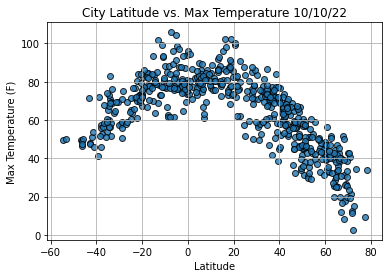

In [57]:
# Build Scatter Plot for Latitude vs Max Temperature
plt.scatter(lats,
           max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')
# Incorpoate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

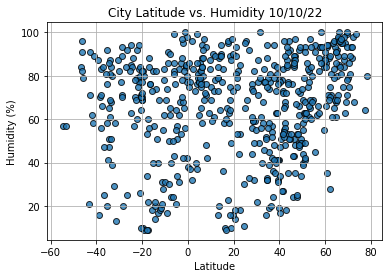

In [58]:
# Build Scatter Plot for Latitude vs Humidity
plt.scatter(lats,
           humidity,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')
# Incorpoate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

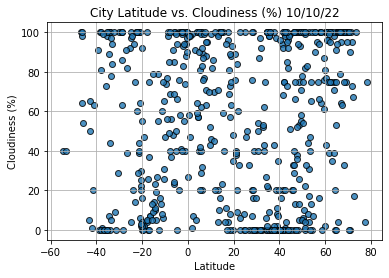

In [59]:
# Build Scatter Plot for Latitude vs Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')
# Incorpoate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

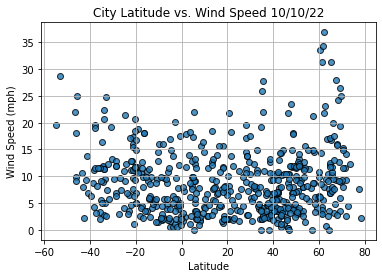

In [60]:
# Build Scatter Plot for Latitude vs Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')
# Incorpoate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [73]:
# Import linear regresstion from the Scipy state module
from scipy.stats import linregress
# Create a function to create perform a linear regression on the weather data
# and ploa a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
index20 = city_data_df.loc[20]
index20

City                      Rikitea
Country                        PF
Date          2022-10-10 17:00:35
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    71.49
Humidity                       70
Cloudiness                     14
Wind Speed                   6.58
Name: 20, dtype: object

In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kem,RU,2022-10-10 17:00:25,64.9555,34.5793,46.96,80,100,12.10
3,Norman Wells,CA,2022-10-10 17:00:26,65.2820,-126.8329,33.22,92,100,31.32
4,Victoria,HK,2022-10-10 16:57:03,22.2855,114.1577,76.32,44,33,11.99
7,Joshimath,IN,2022-10-10 17:00:28,30.5667,79.5667,57.34,71,54,6.02
8,Riyadh,SA,2022-10-10 17:00:29,24.6877,46.7219,87.75,11,0,6.33


In [69]:
# Create Northern and Southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

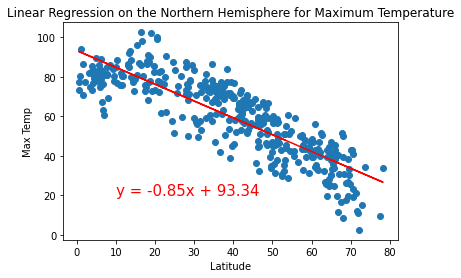

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
for Maximum Temperature', 'Max Temp',(10,20))

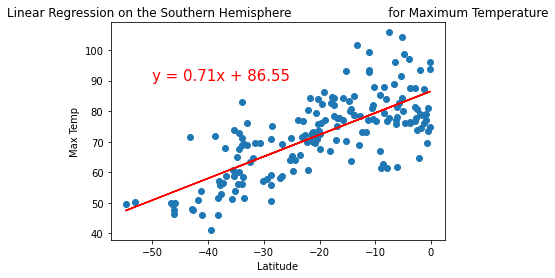

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


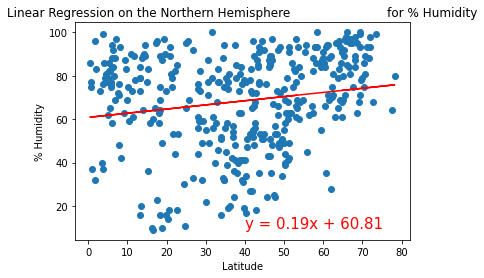

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

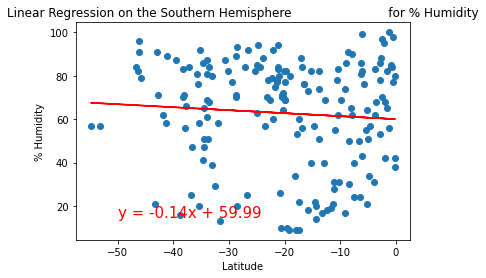

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

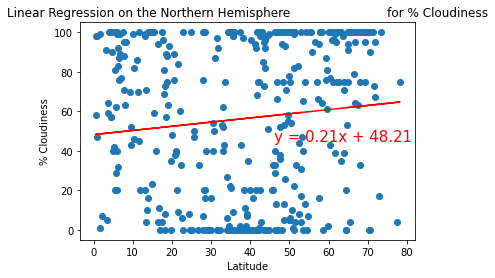

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(46,45))

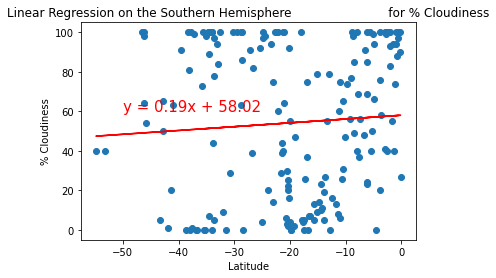

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

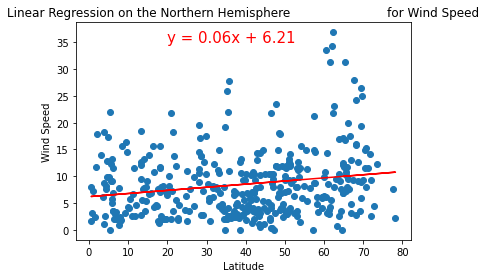

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,35))

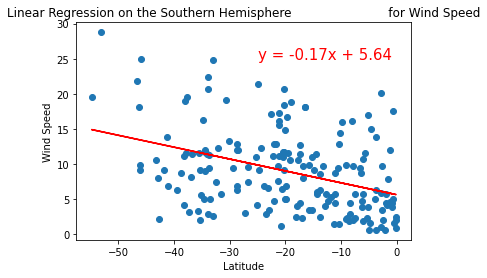

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,25))